In [1]:
# Read the CSV data, and look at the size and head of the data to get some understanding of data
import pandas as pd
data_path = "/Users/thepyguy/Desktop/assignments/CAP-5610/lncRNA_5_Cancers.csv"
data = pd.read_csv(data_path)
print(data.shape)
data.head()

(2529, 12311)


,Ensembl_ID,ENSG00000005206.15,ENSG00000083622.8,ENSG00000088970.14,ENSG00000099869.7,ENSG00000100181.20,ENSG00000104691.13,ENSG00000115934.11,ENSG00000117242.7,ENSG00000118412.11,...,ENSGR0000223511.4,ENSGR0000223571.4,ENSGR0000226179.4,ENSGR0000230542.4,ENSGR0000234622.4,ENSGR0000236017.6,ENSGR0000236871.5,ENSGR0000237531.4,ENSGR0000270726.4,Class
0,TCGA-3Z-A93Z-01A,3.390813,0.0,2.918265,0.014832,0.341984,2.194036,0.0,1.569750,1.159419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KIRC
1,TCGA-6D-AA2E-01A,3.144547,0.0,1.961410,0.047186,1.677598,2.605298,0.0,1.180583,1.127571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KIRC
2,TCGA-A3-3306-01A,2.484817,0.0,2.896470,0.000000,0.087972,3.176764,0.0,1.690582,1.161923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KIRC
3,TCGA-A3-3307-01A,2.789058,0.0,2.439171,0.022316,0.502293,2.679842,0.0,1.659525,1.463067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KIRC
4,TCGA-A3-3308-01A,3.258763,0.0,1.941660,0.050283,0.098625,2.841588,0.0,1.296678,1.728514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KIRC


In [2]:
# Calculate the first two principal components using PCA class from sklearn.decomposition, then subsequently calling fit_transform.
# Additionally, create a dataframe out of it with the three columns: PC1, PC2, and Class, to utilize later for grouping the values using class.
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
reduced_data = (
    pd.DataFrame(pca
                 .fit_transform(data.iloc[:, 1:-1]), 
                 columns=["PC1", "PC2"])
    .assign(Class=data["Class"])
)
# X = data.iloc[:, 1:-1]
# # Y = data.iloc[:, -1]
# pca=PCA(n_components=2)
# Y=pca.fit_transform(X)
# Y
print("Variance Ratio:", pca.explained_variance_ratio_)
reduced_data

Variance Ratio: [0.14820917 0.10182702]


,PC1,PC2,Class
0,-17.864791,15.904503,KIRC
1,-8.682791,9.634450,KIRC
2,-20.860309,16.121578,KIRC
3,-25.767978,19.649743,KIRC
4,-21.025951,13.430290,KIRC
...,...,...,...
2524,-2.416017,-3.437234,THCA
2525,3.469989,4.820638,THCA
2526,5.365098,9.652960,THCA
2527,6.445645,10.172874,THCA


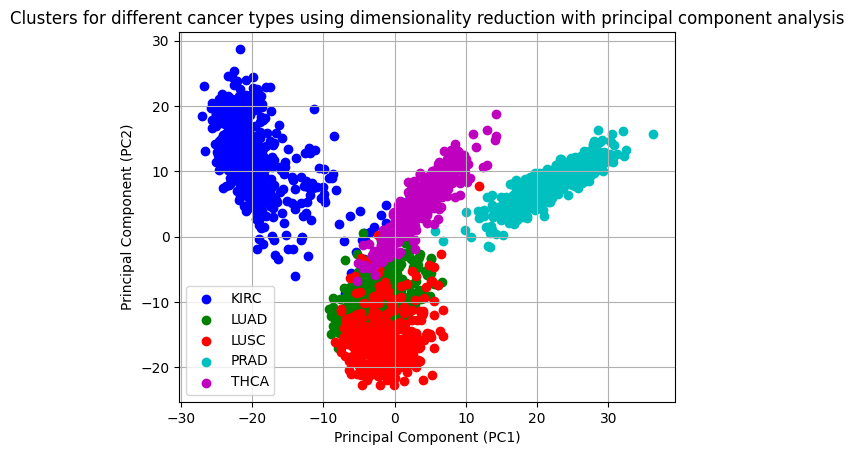

In [3]:
# Create a scatter plot of the calculated principal components, grouping the data by class and using different colors to represent each of the class.
# Add necessary attributes to the matplot figure using such as title, and axes labels
from matplotlib import pyplot as plt
COLORS = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
unique_labels = data["Class"].unique()

# plt.figure(figsize=(4, 6))
for idx, (grp, values) in enumerate(reduced_data.groupby("Class")):
    plt.scatter(values["PC1"], values["PC2"], label=grp, c=COLORS[idx])
# plt.scatter(reduced_data["PC1"], reduced_data["PC2"]) #, c=["r", "g", "b", "y", "w"])
plt.xlabel("Principal Component (PC1)")
plt.ylabel("Principal Component (PC2)")
plt.title("Clusters for different cancer types using dimensionality reduction with principal component analysis")
plt.legend()
plt.grid()
plt.show()

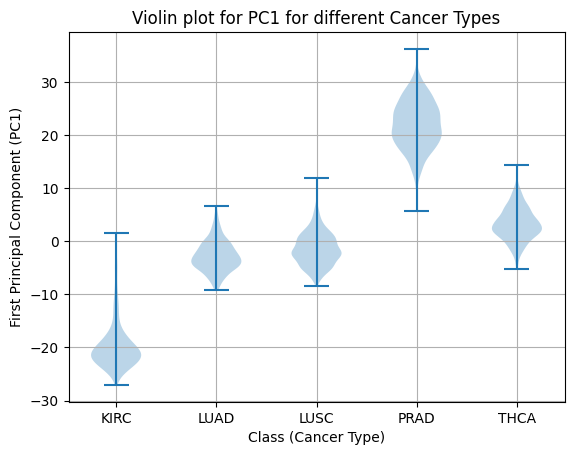

In [4]:
# for idx, (label, grp) in enumerate(reduced_data.groupby("Class")):
#     plt.violinplot(grp["PC1"])
plt.violinplot([reduced_data.loc[reduced_data["Class"]==label, "PC1"] for label in unique_labels])
plt.xticks(ticks=range(1, len(unique_labels)+1), labels=unique_labels)
plt.title("Violin plot for PC1 for different Cancer Types")
plt.ylabel("First Principal Component (PC1)")
plt.xlabel("Class (Cancer Type)")
plt.grid()
plt.show()

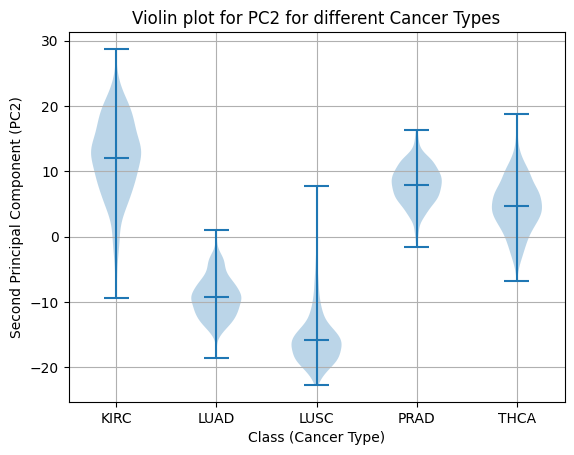

In [5]:
plt.violinplot([reduced_data.loc[reduced_data["Class"]==label, "PC2"] for label in unique_labels], showmeans=True)
plt.xticks(ticks=range(1, len(unique_labels)+1), labels=unique_labels)
plt.title("Violin plot for PC2 for different Cancer Types")
plt.ylabel("Second Principal Component (PC2)")
plt.xlabel("Class (Cancer Type)")
plt.grid()
plt.show()

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X=tsne.fit_transform(data.iloc[:, 1:-1])
reduced_data = pd.DataFrame(X, columns=["t-SNE1", "t-SNE2"]).assign(Class=data["Class"])

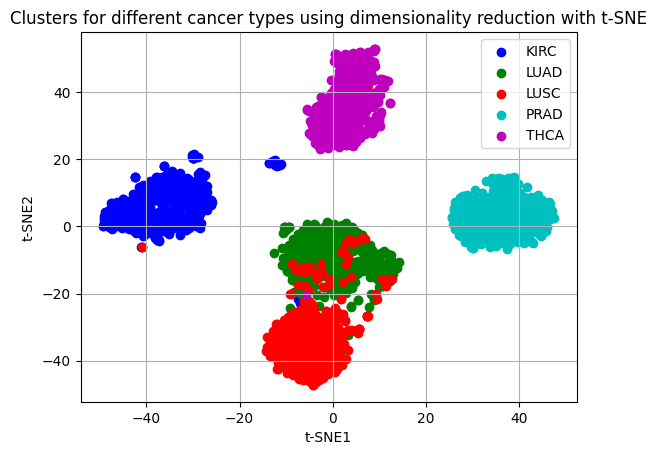

In [7]:
for idx, (grp, values) in enumerate(reduced_data.groupby("Class")):
    plt.scatter(values["t-SNE1"], values["t-SNE2"], label=grp, c=COLORS[idx])
# plt.scatter(reduced_data["PC1"], reduced_data["PC2"]) #, c=["r", "g", "b", "y", "w"])
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.title("Clusters for different cancer types using dimensionality reduction with t-SNE")
plt.legend()
plt.grid()
plt.show()

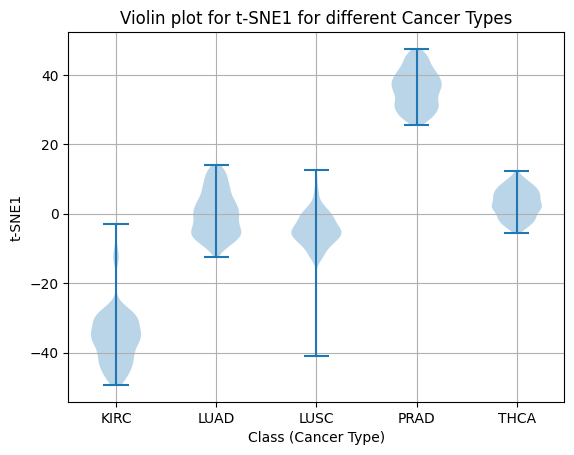

In [8]:
plt.violinplot([reduced_data.loc[reduced_data["Class"]==label, "t-SNE1"] for label in unique_labels])
plt.xticks(ticks=range(1, len(unique_labels)+1), labels=unique_labels)
plt.title("Violin plot for t-SNE1 for different Cancer Types")
plt.ylabel("t-SNE1")
plt.xlabel("Class (Cancer Type)")
plt.grid()
plt.show()

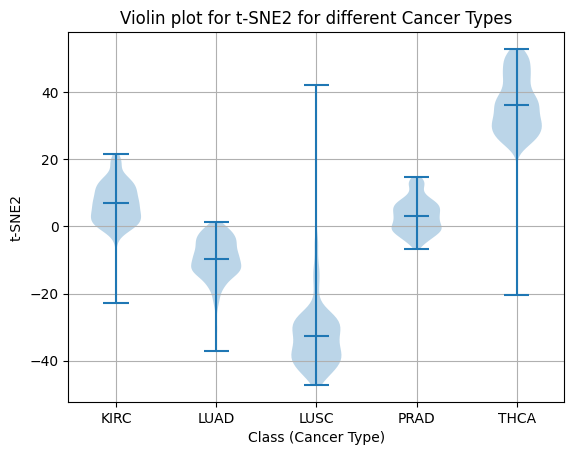

In [9]:
plt.violinplot([reduced_data.loc[reduced_data["Class"]==label, "t-SNE2"] for label in unique_labels], showmeans=True)
plt.xticks(ticks=range(1, len(unique_labels)+1), labels=unique_labels)
plt.title("Violin plot for t-SNE2 for different Cancer Types")
plt.ylabel("t-SNE2")
plt.xlabel("Class (Cancer Type)")
plt.grid()
plt.show()